In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **데이터 전처리**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
# df.head()

In [ ]:
sub_type_mapping = {
    '내비게이션': 0,
    '타이어': 1,
    '라이트': 2,
    '시동': 3,
    '경고등': 4,
    '차량외부': 5,
    '차량내부': 6,
    '주행관련': 7,
    '사고조사': 8,
    '단말기': 9,
    '주유/충전카드': 10,
    '후방카메라': 11,
    '하이패스': 12,
    '차량점검': 13,
    '브레이크': 14,
    '블랙박스': 15,
    '위생문제': 16,
    '주차장': 17,
    'ADAS': 18,
    '비치품': 19,
    '충전기확인': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [ ]:
df['sub_type'] = df['sub_type'].map(func)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [ ]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [ ]:
print('훈련용 리뷰 개수 :', len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :', len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [ ]:
# train_data[:5] # 상위 5개 출력

In [ ]:
# test_data[:5]

In [ ]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [ ]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

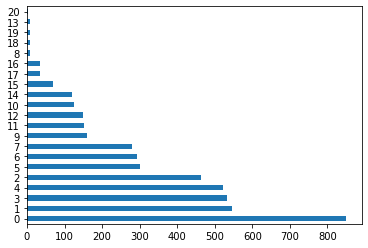

In [ ]:
train_data['sub_type'].value_counts().plot(kind='barh')

In [ ]:
print(train_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [ ]:
print(test_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [ ]:
print(train_data.isnull().values.any())

False


### **토크나이저를 이용한 정수 인코딩**
- 이미 학습해놓은 모델을 사용하다보면 (1)토크나이저, (2)모델 두 가지를 로드해야 한다.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 9.3 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 52.3 MB/s 
     |████████████████████████████████| 596 kB 62.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

transformers.__version__

'4.19.2'

In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base") # 사용하고자 하는 모델 이름

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
# test_data = test_data.dropna(how='any')

print(len(test_data))

1168


In [ ]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [ ]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [ ]:
# print(X_train[0].tokens)

In [ ]:
print(X_train[0].ids)

[2, 9926, 4318, 3915, 6233, 1506, 2372, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


> `type_ids`: 풀고자 하는 문제에서 문장 종류의 개수를 의미
> - 일반적으로 2개 이상의 문장을 가지고 푸는 문제일 경우 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만
> - 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제이므로 [0, 0, 0, 0, 0, 0, 0, 0] 이 들어감


In [ ]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **데이터셋 생성 및 모델 학습**

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [ ]:
X_train

In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해

model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x7ff6f1f5d550>>

In [ ]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(10000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5
146/146 [==============================] - 120s 821ms/step - loss: 3.0445 - accuracy: 0.0722 - val_loss: 3.0445 - val_accuracy: 0.0822
Epoch 2/5
146/146 [==============================] - 120s 821ms/step - loss: 3.0445 - accuracy: 0.0827 - val_loss: 3.0445 - val_accuracy: 0.0822
Epoch 3/5
146/146 [==============================] - 120s 821ms/step - loss: 3.0445 - accuracy: 0.0818 - val_loss: 3.0445 - val_accuracy: 0.0822


In [ ]:
model.evaluate(val_dataset.batch(1024))

2/2 [==============================] - 4s 560ms/step - loss: 3.0445 - accuracy: 0.0822


[3.044522523880005, 0.08219178020954132]

### **모델 저장**

In [ ]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base/tokenizer.json')

### **모델 로드 및 테스트**

In [ ]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequen

In [ ]:
# test_data

In [ ]:
text_classifier('네비게이션이 안 돼요.')[0]

[{'label': 'LABEL_0', 'score': 0.06766916066408157},
 {'label': 'LABEL_1', 'score': 0.04932298883795738},
 {'label': 'LABEL_2', 'score': 0.06416910886764526},
 {'label': 'LABEL_3', 'score': 0.04569995030760765},
 {'label': 'LABEL_4', 'score': 0.018568506464362144},
 {'label': 'LABEL_5', 'score': 0.06253724545240402},
 {'label': 'LABEL_6', 'score': 0.06040089949965477},
 {'label': 'LABEL_7', 'score': 0.033535800874233246},
 {'label': 'LABEL_8', 'score': 0.03763066232204437},
 {'label': 'LABEL_9', 'score': 0.0386679470539093},
 {'label': 'LABEL_10', 'score': 0.05503762513399124},
 {'label': 'LABEL_11', 'score': 0.0686330497264862},
 {'label': 'LABEL_12', 'score': 0.05613471195101738},
 {'label': 'LABEL_13', 'score': 0.05219985172152519},
 {'label': 'LABEL_14', 'score': 0.06029032915830612},
 {'label': 'LABEL_15', 'score': 0.05465149134397507},
 {'label': 'LABEL_16', 'score': 0.04286498948931694},
 {'label': 'LABEL_17', 'score': 0.0318605899810791},
 {'label': 'LABEL_18', 'score': 0.00368

In [ ]:
# 정렬
rank = {}
for i, n in enumerate(text_classifier('네비게이션이 안 돼요.')[0]):
    # print(n)
    rank[i] = n['score']

print(rank)

{0: 0.06766916066408157, 1: 0.04932298883795738, 2: 0.06416910886764526, 3: 0.04569995030760765, 4: 0.018568506464362144, 5: 0.06253724545240402, 6: 0.06040089949965477, 7: 0.033535800874233246, 8: 0.03763066232204437, 9: 0.0386679470539093, 10: 0.05503762513399124, 11: 0.0686330497264862, 12: 0.05613471195101738, 13: 0.05219985172152519, 14: 0.06029032915830612, 15: 0.05465149134397507, 16: 0.04286498948931694, 17: 0.0318605899810791, 18: 0.0036812610924243927, 19: 0.031153017655014992, 20: 0.06529083847999573}


In [ ]:
sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1]))
print(sorted_rank)

# for k, v in sorted_rank:
  # print(k, ': ', v)

{11: 0.0686330497264862, 0: 0.06766916066408157, 20: 0.06529083847999573, 2: 0.06416910886764526, 5: 0.06253724545240402, 6: 0.06040089949965477, 14: 0.06029032915830612, 12: 0.05613471195101738, 10: 0.05503762513399124, 15: 0.05465149134397507, 13: 0.05219985172152519, 1: 0.04932298883795738, 3: 0.04569995030760765, 16: 0.04286498948931694, 9: 0.0386679470539093, 8: 0.03763066232204437, 7: 0.033535800874233246, 17: 0.0318605899810791, 19: 0.031153017655014992, 4: 0.018568506464362144, 18: 0.0036812610924243927}


In [ ]:
sorted_rank.keys()

dict_keys([11, 0, 20, 2, 5, 6, 14, 12, 10, 15, 13, 1, 3, 16, 9, 8, 7, 17, 19, 4, 18])

In [ ]:
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}
print(sub_type_mapping_reverse)

{0: '내비게이션', 1: '타이어', 2: '라이트', 3: '시동', 4: '경고등', 5: '차량외부', 6: '차량내부', 7: '주행관련', 8: '사고조사', 9: '단말기', 10: '주유/충전카드', 11: '후방카메라', 12: '하이패스', 13: '차량점검', 14: '브레이크', 15: '블랙박스', 16: '위생문제', 17: '주차장', 18: 'ADAS', 19: '비치품', 20: '충전기확인'}


In [ ]:
for key in sorted_rank.keys():
    print(sub_type_mapping_reverse.get(key))

후방카메라
내비게이션
충전기확인
라이트
차량외부
차량내부
브레이크
하이패스
주유/충전카드
블랙박스
차량점검
타이어
시동
위생문제
단말기
사고조사
주행관련
주차장
비치품
경고등
ADAS


---

### **분류 결과 확인**

In [ ]:
# 정렬 함수

# 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

def get_category_name(sentence):
    rank = {}
    for i, n in enumerate(text_classifier(sentence)[0]): # 각 라벨 값, 확률값 dictionary로 새로 저장
        rank[i] = n['score']
    
    sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1])) # dictionary 내림차순 정렬

    # sub_category만 보고 싶을 때
    # for key in sorted_rank.keys():
    #     print(sub_type_mapping_reverse.get(key)) # 확률값 높은 순대로 sub_category 출력

    # 확률값까지 보고 싶을 때
    for key, value in sorted_rank.items():
        print(sub_type_mapping_reverse.get(key), '  ', value)

In [ ]:
get_category_name('네비게이션이 안 돼요')

후방카메라    0.06960365176200867
내비게이션    0.06761045753955841
충전기확인    0.06553631275892258
라이트    0.0634971335530281
브레이크    0.061910923570394516
차량외부    0.06050789728760719
차량내부    0.05970142409205437
하이패스    0.05682390183210373
블랙박스    0.055088404566049576
주유/충전카드    0.05372603237628937
차량점검    0.05168808251619339
타이어    0.04933176189661026
시동    0.04657336324453354
위생문제    0.0423344261944294
단말기    0.03952765837311745
사고조사    0.038288671523332596
주행관련    0.03236784785985947
주차장    0.03212261572480202
비치품    0.03190669044852257
경고등    0.018064115196466446
ADAS    0.003788610687479377


In [ ]:
get_category_name('타이어가 펑크났어요.')

내비게이션    0.06420474499464035
충전기확인    0.06405080854892731
브레이크    0.06333416700363159
라이트    0.06319655478000641
차량내부    0.06249415874481201
후방카메라    0.062029194086790085
블랙박스    0.06029403582215309
차량외부    0.05861615017056465
하이패스    0.0552901029586792
차량점검    0.05315064638853073
주유/충전카드    0.05254194140434265
타이어    0.04964299127459526
시동    0.04741087928414345
단말기    0.04209672287106514
위생문제    0.04158521443605423
사고조사    0.03889165446162224
주행관련    0.03378970921039581
비치품    0.03320088982582092
주차장    0.031716521829366684
경고등    0.018860315904021263
ADAS    0.0036025559529662132


In [ ]:
get_category_name('주차 딱지가 붙었는데 어떡하죠?') # 비치품

내비게이션    0.06712110340595245
후방카메라    0.06660698354244232
충전기확인    0.06439940631389618
라이트    0.06434435397386551
차량내부    0.06341811269521713
브레이크    0.06070777401328087
차량외부    0.05758782476186752
블랙박스    0.057296909391880035
주유/충전카드    0.056017979979515076
하이패스    0.055265944451093674
차량점검    0.051463592797517776
타이어    0.04852963984012604
시동    0.04528620094060898
단말기    0.04153076559305191
사고조사    0.039895519614219666
위생문제    0.0397745780646801
주차장    0.03336648643016815
비치품    0.032604802399873734
주행관련    0.03257320448756218
경고등    0.01859874278306961
ADAS    0.003610125742852688


In [ ]:
get_category_name('자동차 전기 충전이 안 돼요 ㅠㅠ')

후방카메라    0.0694899708032608
내비게이션    0.06814070791006088
충전기확인    0.06429165601730347
차량내부    0.06338042765855789
라이트    0.06242992728948593
브레이크    0.05975014716386795
차량외부    0.05896132439374924
하이패스    0.05719178915023804
블랙박스    0.056516990065574646
주유/충전카드    0.052704401314258575
차량점검    0.05095336586236954
타이어    0.04735710471868515
시동    0.04733164981007576
단말기    0.041586052626371384
사고조사    0.04127107188105583
위생문제    0.03945145383477211
주차장    0.03357410803437233
주행관련    0.032806120812892914
비치품    0.0315103754401207
경고등    0.01735590770840645
ADAS    0.003945410251617432


In [ ]:
get_category_name('충전기')

내비게이션    0.06991248577833176
후방카메라    0.06890019029378891
차량내부    0.06394322216510773
브레이크    0.06241018697619438
하이패스    0.061136845499277115
충전기확인    0.0607476569712162
차량외부    0.06056240200996399
라이트    0.05785086378455162
블랙박스    0.05656501650810242
주유/충전카드    0.05565660446882248
차량점검    0.05209672451019287
타이어    0.05042176693677902
시동    0.04690083488821983
위생문제    0.042578522115945816
사고조사    0.03815176337957382
단말기    0.03758525475859642
비치품    0.03268515318632126
주행관련    0.030622370541095734
주차장    0.029554467648267746
경고등    0.01785067282617092
ADAS    0.0038670049980282784


In [ ]:
get_category_name('라이트가 안들어와요')

충전기확인    0.06853538751602173
내비게이션    0.06768302619457245
후방카메라    0.06540435552597046
브레이크    0.06149584427475929
라이트    0.06134861707687378
차량내부    0.05946097895503044
하이패스    0.05743350461125374
차량외부    0.05631932243704796
블랙박스    0.056306980550289154
주유/충전카드    0.05312095955014229
차량점검    0.051649656146764755
타이어    0.047865744680166245
시동    0.04702785611152649
위생문제    0.04356558620929718
단말기    0.04164555296301842
사고조사    0.039638664573431015
주차장    0.035658884793519974
주행관련    0.032290052622556686
비치품    0.03166012838482857
경고등    0.01809075102210045
ADAS    0.0037980966735631227


In [ ]:
get_category_name('후방 카메라가 망가졌나봐요')

내비게이션    0.0688701719045639
후방카메라    0.06656576693058014
충전기확인    0.06400518864393234
차량내부    0.06313656270503998
라이트    0.06252627819776535
브레이크    0.06122569367289543
블랙박스    0.059508536010980606
차량외부    0.057487767189741135
하이패스    0.0559409037232399
주유/충전카드    0.055811163038015366
차량점검    0.05166728422045708
타이어    0.05036960169672966
시동    0.044778838753700256
위생문제    0.04261389374732971
단말기    0.039799872785806656
사고조사    0.0378841795027256
주차장    0.032181575894355774
주행관련    0.031679924577474594
비치품    0.031518127769231796
경고등    0.018650168552994728
ADAS    0.003778513055294752


In [ ]:
get_category_name('차량 내부가 더러워요')

내비게이션    0.06750348210334778
후방카메라    0.06655962765216827
충전기확인    0.06352151930332184
차량내부    0.06302030384540558
브레이크    0.06216667219996452
라이트    0.06111595779657364
차량외부    0.05854972451925278
블랙박스    0.05831190571188927
하이패스    0.056374721229076385
주유/충전카드    0.05513761192560196
차량점검    0.052110057324171066
타이어    0.04746223986148834
시동    0.04703260958194733
위생문제    0.0430062897503376
단말기    0.04078379273414612
사고조사    0.03905624896287918
주차장    0.032485369592905045
주행관련    0.03196325898170471
비치품    0.03122210130095482
경고등    0.01880970597267151
ADAS    0.0038067842833697796


In [ ]:
get_category_name('내비게이션 와이파이가 잘 안됩니다')

내비게이션    0.07112220674753189
브레이크    0.06440698355436325
후방카메라    0.06402401626110077
충전기확인    0.0622665137052536
차량내부    0.06013941019773483
차량외부    0.059186238795518875
라이트    0.059139788150787354
블랙박스    0.05876515805721283
하이패스    0.05650542676448822
주유/충전카드    0.05390729382634163
차량점검    0.05373537167906761
타이어    0.05070101097226143
시동    0.04661897197365761
위생문제    0.042303040623664856
사고조사    0.03907854110002518
단말기    0.03906781226396561
비치품    0.0320771262049675
주행관련    0.03174804523587227
주차장    0.03125958889722824
경고등    0.020223096013069153
ADAS    0.0037243447732180357


In [ ]:
get_category_name('브레이크가 잘 안 눌려요')

내비게이션    0.06751815229654312
후방카메라    0.06714380532503128
브레이크    0.0653703361749649
충전기확인    0.06315995007753372
라이트    0.06286534667015076
차량내부    0.060115307569503784
블랙박스    0.05869951844215393
차량외부    0.05753236263990402
주유/충전카드    0.05600839480757713
하이패스    0.055663637816905975
차량점검    0.05072662606835365
타이어    0.04847113415598869
시동    0.046359214931726456
위생문제    0.04223153740167618
단말기    0.04037145897746086
사고조사    0.038572218269109726
주차장    0.03290928155183792
주행관련    0.032477252185344696
비치품    0.031156228855252266
경고등    0.018761388957500458
ADAS    0.0038867706898599863


In [ ]:
get_category_name('경고등이 깜빡깜빡 거립니다')

후방카메라    0.06911835819482803
내비게이션    0.06898579746484756
충전기확인    0.06639079004526138
차량내부    0.06192787364125252
라이트    0.06112762540578842
브레이크    0.060987021774053574
차량외부    0.06054172292351723
블랙박스    0.05631662905216217
주유/충전카드    0.05485284700989723
하이패스    0.054513268172740936
차량점검    0.04989901930093765
타이어    0.049277033656835556
시동    0.04411425068974495
위생문제    0.043749626725912094
사고조사    0.04021488502621651
단말기    0.039210245013237
주차장    0.032243430614471436
비치품    0.03177162632346153
주행관련    0.030911793932318687
경고등    0.020101269707083702
ADAS    0.0037448557559400797
